In [10]:
from datascience import *
import pandas as pd
import plotly.plotly as py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from IPython.display import display, HTML
CSS = """ .output {flex-direction: row;} """
HTML('<style>{}</style>'.format(CSS))

As we saw in the previous section, it seems to be better to be more specific with search queries. To get a better dataset, I repeated the same process as in the previous section, except I used 'Squamata', an order in the Reptilia class containing snakes and lizards as my search query. 

- **Ciera**: Include reasoning about why you picked Squamata, like why these species are interesting to you. Is it because this is the largest group?

The dataset I created can be downloaded from [here](../data/Squamata_11-14-4da5a9456e334899ac94e513366e22ac.txt)

In [3]:
Squamata=Table.read_table('../data/Squamata_11-14-4da5a9456e334899ac94e513366e22ac.txt', low_memory=False)

In [4]:
Dates_collected=Squamata.select("eventdate", "year", "month", 'day')

In [5]:
Dates_collected.group('year').sort('year')

year,count
199,1
969,2
1084,1
1197,7
1700,283
1801,2
1804,2
1811,1
1812,1
1816,1


It seems there is an error. It is unlikely that there would be samples from before 1200. Since there are only a few samples in this range, I've chosen to exclude them from the graph below. 

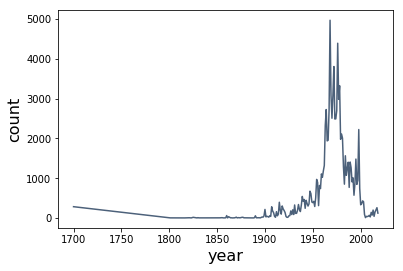

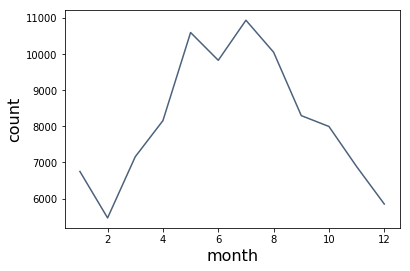

In [7]:
Dates_collected.group('year').where('year', are.not_below(1200)).plot("year")
Dates_collected.group('month').plot("month")

Based on the graphs, it seems like the majority of the samples seem to have been collected in the mid 1900's and the samples were most commonly collected during the mid year months. This is  likely due to the warmer weather of mid year months and correlates with the [brumation](https://en.wikipedia.org/wiki/Dormancy#Brumation) process of reptiles, where reptiles undergo a hibertnation like state during the cold weather. 

## Mapping Squamata Specimens

- Ciera: **Introduce this section. What are you trying to do here?**

In [11]:
Squamata.select("country", "stateprovince", "decimallatitude", "decimallongitude")

country,stateprovince,decimallatitude,decimallongitude
Australia,New South Wales,-33.75,150.7
Australia,New South Wales,-32.2494,151.506
Australia,Queensland,-19.4,146.733
New Caledonia,nan,-21.133,165.316
Australia,Queensland,-17.15,144.516
Australia,Queensland,-14.9,141.616
Australia,South Australia,-34.45,138.85
Australia,Queensland,-9.733,143.416
New Caledonia,nan,-21.4811,165.614
Australia,New South Wales,-33.216,151.566


In [6]:
Squamata_map=Squamata.select("country", "stateprovince", "decimallatitude", "decimallongitude"
                            ).group(range(4)).where('count', are.below(20))
#Note: I limited samples to samples below 20 because I am having trouble importing sklearn to scale the data. 
#If I included the full unscaled data, the scale in the map would look like a mess

In [7]:
Squamata_df_full = pd.DataFrame({'Latitude':Squamata_map.select("decimallatitude").column(0), 
                           "Longitude":Squamata_map.select("decimallongitude").column(0),
                         "Count":Squamata_map.select("count").column(0),
                              "Country":Squamata_map.select("country").column(0)})

In [11]:
scl = [0,"rgb(150,0,90)"],[.125,"rgb(0, 0, 200)"],[.25,"rgb(0, 25, 255)"], [.375,"rgb(0, 152, 255)"],[.5,"rgb(44, 255, 150)"],[.625,"rgb(151, 255, 0)"], [.75,"rgb(255, 234, 0)"],[.875,"rgb(255, 111, 0)"], [1,"rgb(255, 0, 0)"]

data = [ dict(
    lat = Squamata_df_full['Latitude'],
    lon = Squamata_df_full['Longitude'],
    text = Squamata_df_full['Count'],
    marker = dict(
        color = Squamata_df_full['Count'],
        colorscale = scl,
        reversescale = True,
        opacity = 0.7,
        size = 6,
        colorbar = dict(
            thickness = 10,
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            ticklen = 3,
            dtick = 1
        ),
    ),
    type = 'scattergeo'
) ]

layout = dict(
    geo = dict(
        scope = 'world',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 110,
        projection = dict(
            type = 'mercator',
            rotation = dict(
                lon = -100
            )
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title = 'Squamata',
)

fig = { 'data':data, 'layout':layout }
py.iplot(fig, filename='Squamata')

<img src="../data/Squamata_map.png">

- **Ciera**: Awesome Map! You should introduce what the map means a little more. What does the color mean? Some pointers on map visualization. 1. Might be good to apply opacity down to .4 or so so you can see more of the dots. 2. Maybe to apply a better palette, like [viridis](hhttps://stats.stackexchange.com/questions/223315/why-use-colormap-viridis-over-jet). Palettes like viridis are helpful because the colors sequence is uniform perceptually and better for people who are color blind. I see that you are having trouble importing scale. We should sit down and figure this out.

Upon first glance of the map, we can seel the majority of the samples seem to be concencentrated near the lower end of the Americas and Australia. If I were to make a hypothesis, I believe this may be due to 1. climate and 2. sampling bias. Reptiles are ectotherms so they depend on their environment to regulate their internal temperature. Therefore the cold weather in the north may not be suitable for them. You can clearing see sampling bias along the North America Mexico border. It is unlikely that Squamata recognize this border, but rather that American scientists stop collecting at the Mexican border. Sampling bias can greatly alter how we perceive biodiversity patterns and animal range data. 

We can also see that there are a few points that are located in the ocean. Based on the map alone, it is not possible to determine if the samples are located on an island that isn't pictured on the map or if the samples taken were the result of an error in the data. 

## Displaying Family Data with a Sankey Map

- **Ciera**: Introduce Sankey Maps.  They are so coo, that I think it would be interesting to talking about them a bit more

Now lets examine how the taxonomy is distributed in this dataset. Lets first isolate all the relevent taxonomic data.

- **Ciera**: Describe what you are doing  a bit more at each step

In [13]:
Taxonomy=Squamata.where('order', 'Squamata').select("scientificname", "kingdom", "phylum", "class", "order", "family", "genus").group(range(1,7))

In [14]:
Taxonomy.sort('count', descending=True)

kingdom,phylum,class,order,family,genus,count
Animalia,Chordata,Reptilia,Squamata,Iguanidae,Anolis,4571
Animalia,Chordata,Reptilia,Squamata,Phrynosomatidae,Sceloporus,4496
Animalia,Chordata,Reptilia,Squamata,Scincidae,Carlia,4294
Animalia,Chordata,Reptilia,Squamata,Phrynosomatidae,Uta,3646
Animalia,Chordata,Reptilia,Squamata,Scincidae,Ctenotus,3221
Animalia,Chordata,Reptilia,Squamata,Scincidae,Lampropholis,3079
Animalia,Chordata,Reptilia,Squamata,Teiidae,Aspidoscelis,2776
Animalia,Chordata,Reptilia,Squamata,Scincidae,Emoia,2090
Animalia,Chordata,Reptilia,Squamata,Scincidae,Lerista,1904
Animalia,Chordata,Reptilia,Squamata,Colubridae,Thamnophis,1743


In [25]:
family_genus=Squamata.where('order', 'Squamata').select("scientificname", "kingdom", "phylum", "class", "order", "family", "genus").group([5,6])

In [26]:
def return_index(source, target):
    source_index=[]
    target_index=[]
    index=0
    for name_s in source:
        source_index+=[source.index(name_s)]
        target_index+=[index]
        index+=1
    return source_index, target_index

In [27]:
order1=list(Taxonomy.group(['order', 'family']).column(0))
family1=list(Taxonomy.group(['order', 'family']).column(1))

In [28]:
family2=list(Taxonomy.group(['family', 'genus']).group(0).column(0))
genus2= list(Taxonomy.group(['family', 'genus']).column(1))

In [29]:
source_index_list=return_index(order1, family1)[0]
target_index_list=[i + 1 for i in return_index(order1, family1)[1]]
count_list=list(Taxonomy.group(['order', 'family']).column(2))
colors=["blue"]*len(list(Taxonomy.group(['order', 'family']).column(0)))
source_list=['Squamata']+family1

In [31]:
data = dict(
    type='sankey',
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(
        color = "black",
        width = 0.5,
        height = 100
      ),
      label = source_list,
      color = colors
    ),
    link = dict(
      source = source_index_list,
      target = target_index_list,
      value = count_list
  ))

layout =  dict(
    title = "Order to Family",
    font = dict(
      size = 10
    )
)

fig = dict(data=[data], layout=layout)
py.iplot(fig, validate=False)

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

<img src="../data/Order_family_Sankey.png">

It seems the most common family in the dataset seems to be Colubridae, the largest family of snakes. Lets see how the samples of Colubridae are geographically distributed. 

- **Ciera**: Talk a bit more about the Colubridae family.

In [18]:
Colubridae_geo=Squamata.where('family', are.equal_to('Colubridae')).select("country", "stateprovince", "decimallatitude", "decimallongitude")
#.group(range(4))

In [19]:
Colubridae_df_full = pd.DataFrame({'Latitude':Colubridae_geo.select("decimallatitude").column(0), 
                           "Longitude":Colubridae_geo.select("decimallongitude").column(0),
                         #"Count":Colubridae_geo.select("count").column(0),
                              "Country":Colubridae_geo.select("country").column(0)})

In [21]:
scl = [0,"rgb(150,0,90)"],[.125,"rgb(0, 0, 200)"],[.25,"rgb(0, 25, 255)"], [.375,"rgb(0, 152, 255)"],[.5,"rgb(44, 255, 150)"],[.625,"rgb(151, 255, 0)"], [.75,"rgb(255, 234, 0)"],[.875,"rgb(255, 111, 0)"], [1,"rgb(255, 0, 0)"]

data = [ dict(
    lat = Colubridae_df_full['Latitude'],
    lon = Colubridae_df_full['Longitude'],
    #text = Colubridae_df_full['Count'],
    marker = dict(
        #color = Colubridae_df_full['Count'],
        #colorscale = scl,
        #reversescale = True,
        opacity = 0.7,
        size = 6,
        colorbar = dict(
            thickness = 10,
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            ticklen = 3,
            dtick = 1
        ),
    ),
    type = 'scattergeo'
) ]

layout = dict(
    geo = dict(
        scope = 'world',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'mercator',
            rotation = dict(
                lon = -100
            )
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title = 'Colubridae',
)

fig = { 'data':data, 'layout':layout }
py.iplot(fig, filename='Colubridae')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

<img src="../data/Colubridae_map.png">

In [22]:
source_index_list_combined=source_index_list+[i for i in return_index(family2, genus2)[0]]
target_index_list_combined=target_index_list+[i+ len(target_index_list) for i in return_index(family2, genus2)[1]]
count_list_combined=list(Taxonomy.group(['order', 'family']).column(2))+list(family_genus.column(2))
colors_combined=["blue"]*(len(list(Taxonomy.group(['order', 'family']).column(0)))+len(list(Taxonomy.group(['family', 'genus']).column(0))))
source_list_combined=['Squamata']+family1+genus2

NameError: name 'source_index_list' is not defined

In [23]:
data = dict(
    type='sankey',
    node = dict(
      pad = 1500,
      thickness = 20,
      line = dict(
        color = "black",
        width = 1,
        height = 1000,
        domain = dict(
          x =  [0,1],
          y =  [0,1]
    )
      ),
      label = source_list_combined,
      color = colors_combined
    ),
    link = dict(
      source = source_index_list_combined,
      target = target_index_list_combined,
      value = count_list_combined
  ))

layout =  dict(
    title = "Order, Family, Genus",
    font = dict(
      size = 10
    )
)

fig = dict(data=[data], layout=layout)
py.iplot(fig, validate=False)

NameError: name 'source_list_combined' is not defined

<img src="../data/Order_Family_Genus_Sankey.png">

In [ ]:
#upon closer inspection it seems this graph does not connect the right family to genus. I will fix this.

In [ ]:
Squamata.where('genus', are.equal_to(''))